In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertModel

# Load data from CSV file
def load_data(csv_file_path):
    data = pd.read_csv(csv_file_path)
    texts = data['Transcription Text'].values
    labels = data['Emotion Category'].values
    return texts, labels

# Encode labels
def encode_labels(labels):
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    num_classes = len(label_encoder.classes_)
    return encoded_labels, num_classes

# Tokenize text using BERT tokenizer
def tokenize_texts(texts, max_length):
    tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
    tokenized_texts = tokenizer(texts, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')
    return tokenized_texts

# Define the Transformer model
class BengaliTransformer(nn.Module):
    def __init__(self, num_classes):
        super(BengaliTransformer, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Define paths and parameters
csv_file_path = r"E:\Project\dataset\Kuet\KuetTransript.csv"  # Replace with the actual path to your CSV file
max_length = 128  # Maximum sequence length for BERT tokenizer
learning_rate = 1e-5
num_epochs = 5
batch_size = 16

# Load data from CSV file
texts, labels = load_data(csv_file_path)

# Encode labels
encoded_labels, num_classes = encode_labels(labels)

# Tokenize texts
tokenized_texts = tokenize_texts(texts, max_length)

# Convert tokenized texts and encoded labels to PyTorch tensors
input_ids = tokenized_texts['input_ids']
attention_mask = tokenized_texts['attention_mask']
labels_tensor = torch.tensor(encoded_labels, dtype=torch.long)

# Create dataset and data loader
dataset = TensorDataset(input_ids, attention_mask, labels_tensor)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize the model
model = BengaliTransformer(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in data_loader:
        input_ids_batch, attention_mask_batch, labels_batch = batch
        optimizer.zero_grad()
        logits = model(input_ids_batch, attention_mask_batch)
        loss = criterion(logits, labels_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(data_loader)}')

print('Finished Training')


ValueError: text input must of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertModel

# Load data from CSV file
def load_data(csv_file_path):
    data = pd.read_csv(csv_file_path)
    texts = data['Transcription Text'].astype(str).tolist()  # Convert to strings and then to list
    labels = data['Emotion Category'].values
    return texts, labels

# Encode labels
def encode_labels(labels):
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    num_classes = len(label_encoder.classes_)
    return encoded_labels, num_classes

# Tokenize text using BERT tokenizer
def tokenize_texts(texts, max_length):
    tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
    tokenized_texts = tokenizer(texts, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')
    return tokenized_texts

# Define the Transformer model
class BengaliTransformer(nn.Module):
    def __init__(self, num_classes):
        super(BengaliTransformer, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Define paths and parameters
csv_file_path = r"E:\Project\dataset\Kuet\KuetTransript.csv" # Replace with the actual path to your CSV file
max_length = 128  # Maximum sequence length for BERT tokenizer
learning_rate = 1e-5
num_epochs = 5
batch_size = 16

# Load data from CSV file
texts, labels = load_data(csv_file_path)

# Encode labels
encoded_labels, num_classes = encode_labels(labels)

# Tokenize texts
tokenized_texts = tokenize_texts(texts, max_length)

# Convert tokenized texts and encoded labels to PyTorch tensors
input_ids = tokenized_texts['input_ids']
attention_mask = tokenized_texts['attention_mask']
labels_tensor = torch.tensor(encoded_labels, dtype=torch.long)

# Create dataset and data loader
dataset = TensorDataset(input_ids, attention_mask, labels_tensor)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize the model
model = BengaliTransformer(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in data_loader:
        input_ids_batch, attention_mask_batch, labels_batch = batch
        optimizer.zero_grad()
        logits = model(input_ids_batch, attention_mask_batch)
        loss = criterion(logits, labels_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(data_loader)}')

print('Finished Training')


c:\Users\debar\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\debar\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Epoch [1/5], Loss: 1.5051577384011787
Epoch [2/5], Loss: 1.3088188516466241
Epoch [3/5], Loss: 1.187457843830711
Epoch [4/5], Loss: 1.01839115954282
Epoch [5/5], Loss: 0.8341191714270073
Finished Training


In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertModel

# Load data from CSV file
def load_data(csv_file_path):
    data = pd.read_csv(csv_file_path)
    texts = data['Transcription Text'].astype(str).tolist()  # Convert to strings and then to list
    labels = data['Emotion Category'].values
    return texts, labels

# Encode labels
def encode_labels(labels):
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    num_classes = len(label_encoder.classes_)
    return encoded_labels, num_classes

# Tokenize text using BERT tokenizer
def tokenize_texts(texts, max_length):
    tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
    tokenized_texts = tokenizer(texts, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')
    return tokenized_texts

# Define the Transformer model
class BengaliTransformer(nn.Module):
    def __init__(self, num_classes):
        super(BengaliTransformer, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Define paths and parameters
csv_file_path = r"E:\Project\dataset\Kuet\KuetTransript.csv" # Replace with the actual path to your CSV file
max_length = 128  # Maximum sequence length for BERT tokenizer
learning_rate = 1e-5
num_epochs = 5
batch_size = 16

# Load data from CSV file
texts, labels = load_data(csv_file_path)

# Encode labels
encoded_labels, num_classes = encode_labels(labels)

# Split data into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, encoded_labels, test_size=0.3, random_state=42)

# Tokenize texts
train_tokenized_texts = tokenize_texts(train_texts, max_length)
test_tokenized_texts = tokenize_texts(test_texts, max_length)

# Convert tokenized texts and encoded labels to PyTorch tensors for train and test sets
train_input_ids, train_attention_mask, train_labels_tensor = train_tokenized_texts['input_ids'], train_tokenized_texts['attention_mask'], torch.tensor(train_labels, dtype=torch.long)
test_input_ids, test_attention_mask, test_labels_tensor = test_tokenized_texts['input_ids'], test_tokenized_texts['attention_mask'], torch.tensor(test_labels, dtype=torch.long)

# Create train and test datasets and data loaders
train_dataset = TensorDataset(train_input_ids, train_attention_mask, train_labels_tensor)
test_dataset = TensorDataset(test_input_ids, test_attention_mask, test_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
model = BengaliTransformer(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        input_ids_batch, attention_mask_batch, labels_batch = batch
        optimizer.zero_grad()
        logits = model(input_ids_batch, attention_mask_batch)
        loss = criterion(logits, labels_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {running_loss/len(train_loader)}')

# Evaluate the model on the test set
model.eval()
test_loss = 0.0
correct_predictions = 0
total_predictions = 0
with torch.no_grad():
    for batch in test_loader:
        input_ids_batch, attention_mask_batch, labels_batch = batch
        outputs = model(input_ids_batch, attention_mask_batch)
        loss = criterion(outputs, labels_batch)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels_batch.size(0)
        correct_predictions += (predicted == labels_batch).sum().item()

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f'Test Loss: {test_loss/len(test_loader)}, Accuracy: {accuracy}')
print('Finished Training and Evaluation')


Epoch [1/5], Training Loss: 1.566067737340927
Epoch [2/5], Training Loss: 1.3510129630565644
Epoch [3/5], Training Loss: 1.2608307346701622
Epoch [4/5], Training Loss: 1.1259834140539169
Epoch [5/5], Training Loss: 0.9468737751245498
Test Loss: 1.3043650653627183, Accuracy: 0.5238095238095238
Finished Training and Evaluation


#this is final 

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertModel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load data from CSV file
def load_data(csv_file_path):
    data = pd.read_csv(csv_file_path)
    texts = data['Transcription Text'].astype(str).tolist()  # Convert to strings and then to list
    labels = data['Emotion Category'].values
    return texts, labels

# Encode labels
def encode_labels(labels):
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    num_classes = len(label_encoder.classes_)
    return encoded_labels, num_classes

# Tokenize text using BERT tokenizer
def tokenize_texts(texts, max_length):
    tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
    tokenized_texts = tokenizer(texts, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')
    return tokenized_texts

# Define the Transformer model
class BengaliTransformer(nn.Module):
    def __init__(self, num_classes):
        super(BengaliTransformer, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Define paths and parameters
csv_file_path = r"E:\Project\dataset\Kuet\KuetTransript.csv" # Replace with the actual path to your CSV file
max_length = 128  # Maximum sequence length for BERT tokenizer
learning_rate = 1e-5
num_epochs = 5
batch_size = 16

# Load data from CSV file
texts, labels = load_data(csv_file_path)

# Encode labels
encoded_labels, num_classes = encode_labels(labels)

# Split data into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, encoded_labels, test_size=0.3, random_state=42)

# Tokenize texts
train_tokenized_texts = tokenize_texts(train_texts, max_length)
test_tokenized_texts = tokenize_texts(test_texts, max_length)

# Convert tokenized texts and encoded labels to PyTorch tensors for train and test sets
train_input_ids, train_attention_mask, train_labels_tensor = train_tokenized_texts['input_ids'], train_tokenized_texts['attention_mask'], torch.tensor(train_labels, dtype=torch.long)
test_input_ids, test_attention_mask, test_labels_tensor = test_tokenized_texts['input_ids'], test_tokenized_texts['attention_mask'], torch.tensor(test_labels, dtype=torch.long)

# Create train and test datasets and data loaders
train_dataset = TensorDataset(train_input_ids, train_attention_mask, train_labels_tensor)
test_dataset = TensorDataset(test_input_ids, test_attention_mask, test_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
model = BengaliTransformer(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        input_ids_batch, attention_mask_batch, labels_batch = batch
        optimizer.zero_grad()
        logits = model(input_ids_batch, attention_mask_batch)
        loss = criterion(logits, labels_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

# Evaluate the model on the test set
model.eval()
test_loss = 0.0
correct_predictions = 0
total_predictions = 0
predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids_batch, attention_mask_batch, labels_batch = batch
        outputs = model(input_ids_batch, attention_mask_batch)
        loss = criterion(outputs, labels_batch)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.tolist())
        total_predictions += labels_batch.size(0)
        correct_predictions += (predicted == labels_batch).sum().item()

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f'Test Loss: {test_loss/len(test_loader)}, Accuracy: {accuracy}')
#Print Confussion matrix
cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(f'Total emotion levels in the confusion matrix: {len(classes)}')
# Print classification report
print(classification_report(test_labels, predictions))

c:\Users\debar\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


: 

Epoch [1/1], Loss: 1.5480897665023803
Test Loss: 1.4422246085272894, Accuracy: 0.41025641025641024


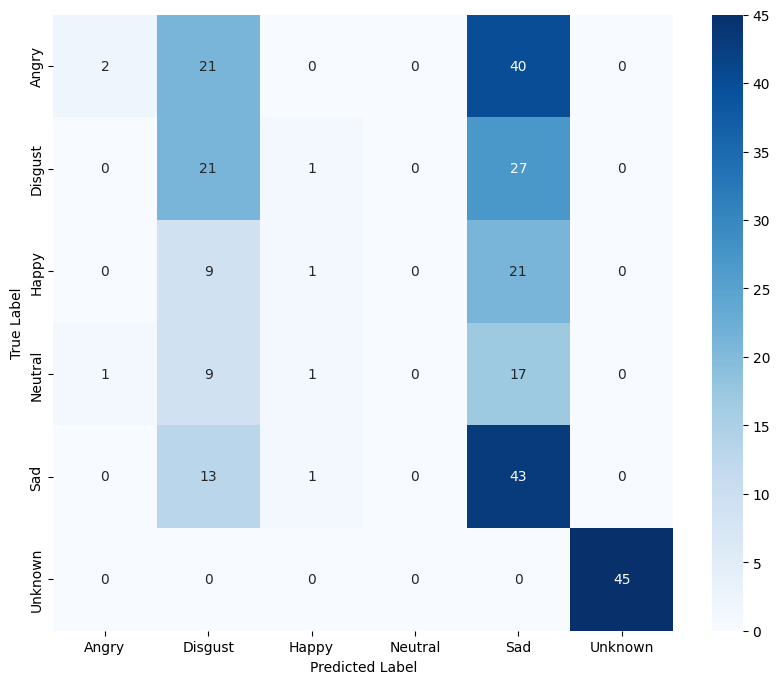

Total emotion levels in the confusion matrix: 6


In [9]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertModel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load data from CSV file
def load_data(csv_file_path):
    data = pd.read_csv(csv_file_path)
    texts = data['Transcription Text'].astype(str).tolist()  # Convert to strings and then to list
    labels = data['Emotion Category'].values
    return texts, labels

# Encode labels
def encode_labels(labels):
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    num_classes = len(label_encoder.classes_)
    return encoded_labels, num_classes, label_encoder.classes_

# Tokenize text using BERT tokenizer
def tokenize_texts(texts, max_length):
    tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
    tokenized_texts = tokenizer(texts, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')
    return tokenized_texts

# Define the Transformer model
class BengaliTransformer(nn.Module):
    def __init__(self, num_classes):
        super(BengaliTransformer, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Define paths and parameters
csv_file_path = r"E:\Project\dataset\Kuet\KuetTransript.csv" # Replace with the actual path to your CSV file
max_length = 128  # Maximum sequence length for BERT tokenizer
learning_rate = 1e-5
num_epochs = 1
batch_size = 16

# Load data from CSV file
texts, labels = load_data(csv_file_path)

# Encode labels
encoded_labels, num_classes, classes = encode_labels(labels)

# Split data into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, encoded_labels, test_size=0.3, random_state=42)

# Tokenize texts
train_tokenized_texts = tokenize_texts(train_texts, max_length)
test_tokenized_texts = tokenize_texts(test_texts, max_length)

# Convert tokenized texts and encoded labels to PyTorch tensors for train and test sets
train_input_ids, train_attention_mask, train_labels_tensor = train_tokenized_texts['input_ids'], train_tokenized_texts['attention_mask'], torch.tensor(train_labels, dtype=torch.long)
test_input_ids, test_attention_mask, test_labels_tensor = test_tokenized_texts['input_ids'], test_tokenized_texts['attention_mask'], torch.tensor(test_labels, dtype=torch.long)

# Create train and test datasets and data loaders
train_dataset = TensorDataset(train_input_ids, train_attention_mask, train_labels_tensor)
test_dataset = TensorDataset(test_input_ids, test_attention_mask, test_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
model = BengaliTransformer(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        input_ids_batch, attention_mask_batch, labels_batch = batch
        optimizer.zero_grad()
        logits = model(input_ids_batch, attention_mask_batch)
        loss = criterion(logits, labels_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

# Evaluate the model on the test set
model.eval()
test_loss = 0.0
correct_predictions = 0
total_predictions = 0
predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids_batch, attention_mask_batch, labels_batch = batch
        outputs = model(input_ids_batch, attention_mask_batch)
        loss = criterion(outputs, labels_batch)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.tolist())
        total_predictions += labels_batch.size(0)
        correct_predictions += (predicted == labels_batch).sum().item()

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f'Test Loss: {test_loss/len(test_loader)}, Accuracy: {accuracy}')

# Plot the confusion matrix
cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(f'Total emotion levels in the confusion matrix: {len(classes)}')


In [ ]:

from sklearn.metrics import f1_score, accuracy_score

best_loss = float('inf')
early_stop_count = 0
early_stop_at = 10

for epoch in range(EPOCHS):
    if early_stop_count == early_stop_at:
        break
    else:
        print('Epoch: {}/{}'.format(epoch+1, EPOCHS))
        pbar = tf.keras.utils.Progbar(int(910/(batch_size)), width=30, interval=1)
       
        for step, (inp, tar) in enumerate(train_dataset):
            train_step(inp, tar)
            pbar.add(1, values=[("train_loss", train_loss.result()) ])
           
        y_true_valid = []
        y_pred_valid = []
        print('Evaluating Validation Dataset')
        for inp, tar in valid_dataset:
            for x in tar.numpy():
                for y in x:
                    y_true_valid.append(Emo_Dict[y])

            for z in model.predict(inp):
                y_pred_valid.append(Emo_Dict[np.argmax(z)])

        mfscore_valid = f1_score(y_true_valid, y_pred_valid, labels=Emo_Dict, average='macro')
        valid_accuracy = accuracy_score(y_true_valid, y_pred_valid)
       
        y_true_test = []
        y_pred_test = []
        print('Evaluating Test Dataset')
        for inp, tar in test_dataset:
            for x in tar.numpy():
                for y in x:
                    y_true_test.append(Emo_Dict[y])

            for z in model.predict(inp):
                y_pred_test.append(Emo_Dict[np.argmax(z)])

        mfscore_test = f1_score(y_true_test, y_pred_test, labels=Emo_Dict, average='macro')
        test_accuracy = accuracy_score(y_true_test, y_pred_test)

        print('Train Loss: {}, Macro F [Valid/Test]: {}/{}, Accuracy [Valid/Test]: {}/{}'.format(
            round(float(train_loss.result()), 4), round(mfscore_valid, 4), round(mfscore_test, 4),
            round(valid_accuracy, 4), round(test_accuracy, 4)))
       
        if float(mfscore_valid) >= best_f_score_valid:
            print('Macro F-score [Valid]: {} \nMacro F-score [Test]: {}'.format(
                float(round(mfscore_valid, 4)), float(round(mfscore_test, 4))))
           
            ckpt_save_path = ckpt_manager.save()
            print('Saving checkpoint for {} step(s) at {}'.format(optimizer.iterations.numpy(), ckpt_save_path))
            early_stop_count = 0
        else:
            print('Macro F-score [Valid] did not improve.')
            early_stop_count += 1
            print('Score did not improve for {} epoch(s). Current Steps: {}'.format(
                early_stop_count, optimizer.iterations.numpy()))

        train_loss.reset_states()

        print("------------------------------------")

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the Transformer model
class BengaliTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, num_layers=6, embed_dim=128, num_heads=8, ff_dim=512, rate=0.1):
        super(BengaliTransformer, self).__init__()
        self.embedding = nn.Embedding(input_dim, embed_dim)
        self.positional_encoding = PositionalEncoding(embed_dim)
        self.transformer_blocks = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads, ff_dim, rate) for _ in range(num_layers)
        ])
        self.dropout = nn.Dropout(rate)
        self.fc = nn.Linear(embed_dim, num_classes)
        
    def forward(self, x):
        x = self.embedding(x)
        x = self.positional_encoding(x)
        for transformer in self.transformer_blocks:
            x = transformer(x)
        x = self.dropout(x[:, 0, :])  # Take the first token's output
        x = self.fc(x)
        return x

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return x

class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim, num_heads)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.layernorm1 = nn.LayerNorm(embed_dim)
        self.layernorm2 = nn.LayerNorm(embed_dim)
        self.dropout1 = nn.Dropout(rate)
        self.dropout2 = nn.Dropout(rate)
        
    def forward(self, x):
        attention_out, _ = self.attention(x, x, x)
        x = x + self.dropout1(attention_out)
        x = self.layernorm1(x)
        ffn_out = self.ffn(x)
        x = x + self.dropout2(ffn_out)
        x = self.layernorm2(x)
        return x

# Load data from CSV file
def load_data(csv_file_path):
    data = pd.read_csv(csv_file_path)
    texts = data['Transcription Text'].astype(str).tolist()  # Convert to strings and then to list
    labels = data['Emotion Category'].values
    return texts, labels

# Encode labels
def encode_labels(labels):
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    num_classes = len(label_encoder.classes_)
    return encoded_labels, num_classes, label_encoder.classes_

# Tokenize text using BERT tokenizer
def tokenize_texts(texts, vocab):
    tokenizer = lambda x: [vocab[token] for token in x.split()]
    tokenized_texts = [tokenizer(text) for text in texts]
    return tokenized_texts

# Define paths and parameters
csv_file_path = r"E:\Project\dataset\Kuet\KuetTransript.csv"  # Replace with the actual path to your CSV file
learning_rate = 1e-4
num_epochs = 500
batch_size = 16

# Load data from CSV file
texts, labels = load_data(csv_file_path)

# Encode labels
encoded_labels, num_classes, classes = encode_labels(labels)

# Build vocabulary
vocab = {}
idx = 0
for text in texts:
    for token in text.split():
        if token not in vocab:
            vocab[token] = idx
            idx += 1

# Tokenize texts
tokenized_texts = tokenize_texts(texts, vocab)

# Pad tokenized sequences
max_len = max(len(seq) for seq in tokenized_texts)
padded_texts = [seq + [0] * (max_len - len(seq)) for seq in tokenized_texts]

# Convert tokenized texts and encoded labels to PyTorch tensors for train and test sets
text_tensor = torch.tensor(padded_texts, dtype=torch.long)
label_tensor = torch.tensor(encoded_labels, dtype=torch.long)

# Create train and test datasets and data loaders
dataset = TensorDataset(text_tensor, label_tensor)
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
model = BengaliTransformer(input_dim=len(vocab), num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

# Evaluate the model on the test set
model.eval()
test_loss = 0.0
correct_predictions = 0
total_predictions = 0
predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.tolist())
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f'Test Loss: {test_loss/len(test_loader)}, Accuracy: {accuracy}')

# Plot the confusion matrix
cm = confusion_matrix(encoded_labels[train_size:], predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(f'Total emotion levels in the confusion matrix: {len(classes)}')


Epoch [1/500], Loss: 1.592503735423088
Epoch [2/500], Loss: 1.3596587479114532
Epoch [3/500], Loss: 1.2986100241541862
Epoch [4/500], Loss: 1.2638954058289529
Epoch [5/500], Loss: 1.2099256113171577
Epoch [6/500], Loss: 1.1474254116415978
Epoch [7/500], Loss: 1.1263876289129258
Epoch [8/500], Loss: 1.07006174325943
Epoch [9/500], Loss: 1.019976721704006
Epoch [10/500], Loss: 0.9418805867433548
Epoch [11/500], Loss: 0.913724485039711
Epoch [12/500], Loss: 0.8636923499405385
Epoch [13/500], Loss: 0.851862957328558
Epoch [14/500], Loss: 0.8309367708861828
Epoch [15/500], Loss: 0.7737457059323788
Epoch [16/500], Loss: 0.7663751162588597
Epoch [17/500], Loss: 0.753177696466446


KeyboardInterrupt: 

#Final model for text dataset

c:\Users\debar\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


Epoch [1/5], Loss: 1.5555334717035294
Epoch [2/5], Loss: 1.3396438390016556
Epoch [3/5], Loss: 1.2503081306815147
Epoch [4/5], Loss: 1.1245456755161285
Epoch [5/5], Loss: 0.9241461403667927
Test Loss: 1.305381589465671, Accuracy: 0.5421245421245421


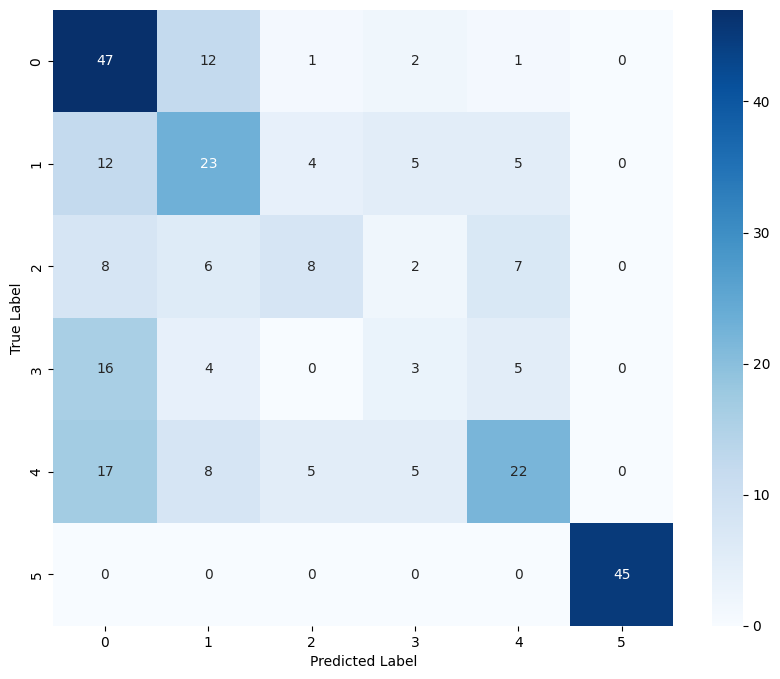

              precision    recall  f1-score   support

           0       0.47      0.75      0.58        63
           1       0.43      0.47      0.45        49
           2       0.44      0.26      0.33        31
           3       0.18      0.11      0.13        28
           4       0.55      0.39      0.45        57
           5       1.00      1.00      1.00        45

    accuracy                           0.54       273
   macro avg       0.51      0.49      0.49       273
weighted avg       0.53      0.54      0.52       273



In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertModel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Load data from CSV file
def load_data(csv_file_path):
    data = pd.read_csv(csv_file_path)
    texts = data['Transcription Text'].astype(str).tolist()  # Convert to strings and then to list
    labels = data['Emotion Category'].values
    return texts, labels

# Encode labels
def encode_labels(labels):
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    num_classes = len(label_encoder.classes_)
    return encoded_labels, num_classes

# Tokenize text using BERT tokenizer
def tokenize_texts(texts, max_length):
    tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
    tokenized_texts = tokenizer(texts, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')
    return tokenized_texts

# Define the Transformer model
class BengaliTransformer(nn.Module):
    def __init__(self, num_classes):
        super(BengaliTransformer, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Define paths and parameters
csv_file_path = r"E:\Project\dataset\Kuet\KuetTransript.csv" # Replace with the actual path to your CSV file
max_length = 128  # Maximum sequence length for BERT tokenizer
learning_rate = 1e-5
num_epochs = 5
batch_size = 16

# Load data from CSV file
texts, labels = load_data(csv_file_path)

# Encode labels
encoded_labels, num_classes = encode_labels(labels)

# Split data into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, encoded_labels, test_size=0.3, random_state=42)

# Tokenize texts
train_tokenized_texts = tokenize_texts(train_texts, max_length)
test_tokenized_texts = tokenize_texts(test_texts, max_length)

# Convert tokenized texts and encoded labels to PyTorch tensors for train and test sets
train_input_ids, train_attention_mask, train_labels_tensor = train_tokenized_texts['input_ids'], train_tokenized_texts['attention_mask'], torch.tensor(train_labels, dtype=torch.long)
test_input_ids, test_attention_mask, test_labels_tensor = test_tokenized_texts['input_ids'], test_tokenized_texts['attention_mask'], torch.tensor(test_labels, dtype=torch.long)

# Create train and test datasets and data loaders
train_dataset = TensorDataset(train_input_ids, train_attention_mask, train_labels_tensor)
test_dataset = TensorDataset(test_input_ids, test_attention_mask, test_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
model = BengaliTransformer(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        input_ids_batch, attention_mask_batch, labels_batch = batch
        optimizer.zero_grad()
        logits = model(input_ids_batch, attention_mask_batch)
        loss = criterion(logits, labels_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

# Evaluate the model on the test set
model.eval()
test_loss = 0.0
correct_predictions = 0
total_predictions = 0
predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids_batch, attention_mask_batch, labels_batch = batch
        outputs = model(input_ids_batch, attention_mask_batch)
        loss = criterion(outputs, labels_batch)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.tolist())
        total_predictions += labels_batch.size(0)
        correct_predictions += (predicted == labels_batch).sum().item()

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f'Test Loss: {test_loss/len(test_loader)}, Accuracy: {accuracy}')

# Plot the confusion matrix                                                                                                                                                                                                                                                                 
cm = confusion_matrix(test_labels, predictions)                                                                
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print(classification_report(test_labels, predictions))
                                                              